Training directory structure: ['NORMAL', 'PNEUMONIA']
Validation directory structure: ['NORMAL', 'PNEUMONIA']
NORMAL - Training images: 1341
PNEUMONIA - Training images: 3639
NORMAL - Validation images: 234
PNEUMONIA - Validation images: 390
Found 4980 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Training batch shape: (32, 224, 224, 3)
Training labels shape: (32, 2)
Validation batch shape: (32, 224, 224, 3)
Validation labels shape: (32, 2)
Total training images: 4980, steps per epoch: 155
Total validation images: 624, validation steps: 19
Epoch 1/10


C:\Users\anuhy\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


155/155 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.6457 - loss: 4.9991 - val_accuracy: 0.6234 - val_loss: 0.6651 - learning_rate: 0.0010
Epoch 2/10
  1/155 ━━━━━━━━━━━━━━━━━━━━ 5:09 2s/step - accuracy: 0.7500 - loss: 0.5826

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7500 - loss: 0.5826 - val_accuracy: 0.6875 - val_loss: 0.6230 - learning_rate: 0.0010
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 474s 3s/step - accuracy: 0.7334 - loss: 0.6026 - val_accuracy: 0.6234 - val_loss: 0.6700 - learning_rate: 0.0010
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7188 - loss: 0.6487 - val_accuracy: 0.6875 - val_loss: 0.6214 - learning_rate: 0.0010
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.7274 - loss: 0.6092 - val_accuracy: 0.6299 - val_loss: 0.7180 - learning_rate: 0.0010
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7500 - loss: 0.5712 - val_accuracy: 0.4375 - val_loss: 0.9896 - learning_rate: 0.0010
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 0.7325 - loss: 0.6189 - val_accuracy: 0.6250 - val_loss: 0.6619 - learning_rate: 0.0010
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6562 - loss: 0.6524 - val_accu

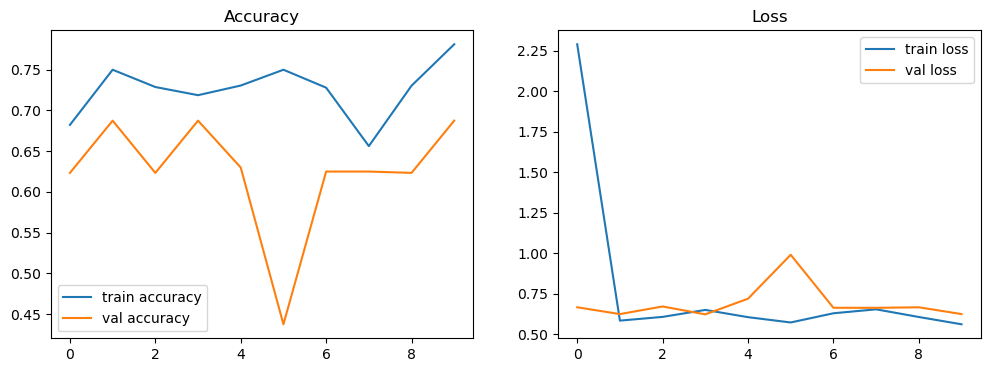

In [1]:
import os
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Define image size and paths
IMAGE_SIZE = [224, 224]
train_path = r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\train"
valid_path = r"C:\Users\anuhy\Downloads\archive (3)\chest_xray\test"

# Verify the structure of the directories
print(f"Training directory structure: {os.listdir(train_path)}")
print(f"Validation directory structure: {os.listdir(valid_path)}")

# Print the number of images in each directory
for class_name in os.listdir(train_path):
    print(f"{class_name} - Training images: {len(os.listdir(os.path.join(train_path, class_name)))}")

for class_name in os.listdir(valid_path):
    print(f"{class_name} - Validation images: {len(os.listdir(os.path.join(valid_path, class_name)))}")

# Load the EfficientNetB0 model without the top layers and freeze the layers
efficientnet = EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in efficientnet.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(efficientnet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=efficientnet.input, outputs=prediction)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the training set
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Prepare the test set
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print batch data to ensure it is loading correctly
for data_batch, labels_batch in training_set:
    print("Training batch shape:", data_batch.shape)
    print("Training labels shape:", labels_batch.shape)
    break

for data_batch, labels_batch in test_set:
    print("Validation batch shape:", data_batch.shape)
    print("Validation labels shape:", labels_batch.shape)
    break

# Calculate steps_per_epoch manually
total_train_images = sum([len(files) for r, d, files in os.walk(train_path)])
total_val_images = sum([len(files) for r, d, files in os.walk(valid_path)])
steps_per_epoch = total_train_images // 32
validation_steps = total_val_images // 32

print(f"Total training images: {total_train_images}, steps per epoch: {steps_per_epoch}")
print(f"Total validation images: {total_val_images}, validation steps: {validation_steps}")

# Callbacks for learning rate adjustment and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=steps_per_epoch,  # Use calculated steps
    validation_steps=validation_steps,  # Use calculated steps
    callbacks=[lr_scheduler, early_stopping]
)

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()
